# CEN426 - Introduction to Machine Learning Task 4
---
The student must use the ANFIS model to make a decision (regression or classification) on a sample dataset, then interpret the results.
### Name: Furkan Çetinkaya \<furkan.cetinkaya@outlook.com.tr\>
### StudentID: 2016556017

In [1]:
import pandas     as pd                           # DataFrame Library
import tensorflow as tf                           # Tensorflow, library to develop and train ML models
from Models.myanfis import ANFIS                  # ANFIS model from: https://github.com/gregorLen/AnfisTensorflow2.0
from Models.myanfis import fis_parameters         # Model Configuration class
from sklearn.utils           import shuffle       # For shuffling the dataset
from sklearn.decomposition   import PCA           # For dimensionality reduction
from sklearn.model_selection import KFold         # k-fold Cross
from sklearn.preprocessing   import MinMaxScaler  # For converting negative ranges into [0,1] range

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Read and Shuffle the dataset

In [2]:
df = shuffle(pd.read_csv('forest_fires.csv'))
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
74,14,8,2012,33,66,14,0.0,87.0,21.7,94.7,5.7,27.2,10.6,fire
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
58,29,7,2012,32,73,15,0.0,86.6,26.7,127.0,5.6,35.0,11.9,fire
57,28,7,2012,33,76,15,0.0,86.5,24.4,117.8,5.6,32.1,11.3,fire
29,30,6,2012,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,12,8,2012,39,21,17,0.4,93.0,18.4,41.5,15.5,18.4,18.8,fire
234,22,9,2012,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
165,15,7,2012,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,fire


### Preprocess the dataset
* Seperate labels and features
* Reduce the dimensionality of features into 2, using PCA
* Move negative range into [0,1] with MinMaxScaler()

In [3]:
df.Classes.replace(('not_fire', 'fire'), (0, 1), inplace=True)
Y = df[0:200]['Classes']
minMaxScaler = MinMaxScaler()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[0:200].drop(['day', 'month', 'year', 'Classes'], axis=1))
X = minMaxScaler.fit_transform(X_pca)
X

array([[0.43152462, 0.56418364],
       [0.11262241, 0.45651753],
       [0.56487251, 0.70865033],
       [0.523503  , 0.71473527],
       [0.43449739, 0.39538556],
       [0.23530294, 0.29745725],
       [0.07851236, 0.50782734],
       [0.00944149, 0.9385619 ],
       [0.02176802, 0.77578448],
       [0.26691958, 0.31477607],
       [0.03006773, 0.70339485],
       [0.14511981, 0.59315226],
       [0.16306751, 0.29928203],
       [0.0684317 , 0.25374223],
       [0.2936588 , 0.33884573],
       [0.27818909, 0.66211298],
       [0.32387137, 0.37411964],
       [0.26759982, 0.55325518],
       [0.59957202, 0.79685463],
       [0.44795137, 0.43763951],
       [0.13246124, 0.2817525 ],
       [0.43613797, 0.04474331],
       [0.09278941, 0.42236158],
       [0.53466582, 0.48813978],
       [0.09055784, 0.56401076],
       [0.63574304, 0.57291333],
       [0.13926293, 0.60957842],
       [0.36871702, 0.28718675],
       [0.03580373, 0.62406324],
       [0.02845933, 0.70384848],
       [0.

### Configure ANFIS model

In [4]:
param = fis_parameters(
    n_input = 2,
    n_memb = 2,
    batch_size = 5,
    memb_func = 'gaussian',
    optimizer = 'sgd',
    loss = tf.keras.losses.MeanAbsoluteError(),
    n_epochs = 30
)

### Create, train and validate ANFIS model

In [5]:
kfold = KFold(n_splits=2)
histories = []

for train_index,test_index in kfold.split(X):
    X_train,X_test = X[train_index],X[test_index]
    Y_train,Y_test = Y.iloc[train_index],Y.iloc[test_index]

    fis = ANFIS(
                n_input=param.n_input,
                n_memb=param.n_memb,
                batch_size=param.batch_size,
                memb_func=param.memb_func,
                name= 'firstAnfis'
                )

    fis.model.compile(
                        optimizer=param.optimizer,
                        loss=param.loss,
                        metrics=['mae']
                     )

    history = fis.fit(
                        X_train,Y_train,
                        epochs=param.n_epochs,
                        batch_size=param.batch_size,
                        validation_data=(X_test,Y_test)
                    )

    histories.append(history)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpwj2vf24w.py, line 22)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/30
20/20 [==============================] - 2s 23ms/step - loss: 0.3928 - mae: 0.3928 - val_loss: 0.3125 - val_mae: 0.3125
Epoch 2/30
20/20 [==============================] - 0s 9ms/step - loss: 0.3692 - mae: 0.3692 - val_loss: 0.3039 - val_mae: 0.3039
Epoch 3/30
20/20 [==============================] - 0s 7ms/step - loss: 0.3580 - mae: 0.3580 - val_loss: 0.2966 - val_mae: 0.2966
Epoch 4/30
20/20 [==============================] - 0s 8ms/step - loss: 0.3452 - mae: 0.3452 - val_loss: 0.3020 - val_mae: 0.3020
Epoch 5/30
20/20 [==============================] - 0s 7ms/step - loss: 0.3266 - mae: 0.3266 - val_loss: 0.2862 - val_mae: 0.2862
Epoch 6/30
20/20 [=============================

### Plot the results

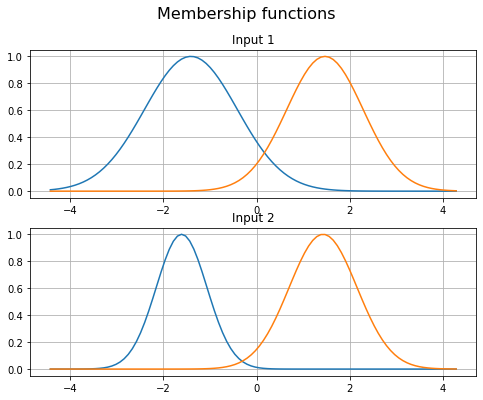

<AxesSubplot:>

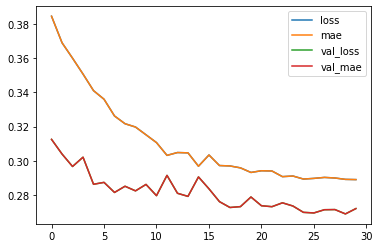

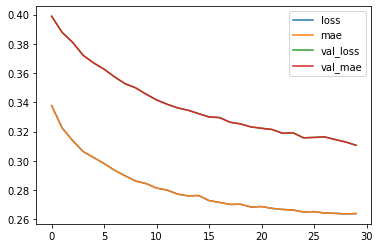

In [6]:
fis.plotmfs() #Graphic of Membership function
pd.DataFrame(histories[0].history).plot()
pd.DataFrame(histories[1].history).plot()